This notebook is aimed at using plotly to find diurnal variations in data.

In [1]:
import os
import pandas as pd
import time
import plotly.express as pe
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.colors as colors
import matplotlib.pyplot as plt

from datetime import datetime

#
os.chdir('/Users/gaurav/UAH/temperature_modelling/')

from lib import dataprocess as dp

In [3]:
grouped_data = pd.read_csv('Analytics/temp_data/grouped_data_untouched.csv')
grouped_data.loc[:,'average_temp'] = grouped_data[['closest_station_1_temp','closest_station_2_temp','closest_station_3_temp']].mean(axis=1)


In [45]:
gd = grouped_data[['station', 'hour','latitude','longitude','temperature','closest_station_1_temp','closest_station_2_temp','closest_station_3_temp']]
gd.loc[:,'average_temp'] = gd[['closest_station_1_temp','closest_station_2_temp','closest_station_3_temp']].mean(axis=1)

gd['variation_closest'] = 100*abs(gd['temperature']-gd['average_temp'])/gd['average_temp']
flags = gd[gd.variation_closest>20].groupby('station').count().index.values

grouped_data_anomalous = grouped_data[grouped_data.station.isin(flags)]
grouped_data_normal = grouped_data[~grouped_data.station.isin(flags)]

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_31745/2873235481.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_31745/2873235481.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
# pe.line(grouped_data_anomalous[~grouped_data_anomalous.station.isin(flags)], x="hour", y="temperature", color='station', title='Adjusted LST for 12 random stations')

pe.line(grouped_data_anomalous, x="hour", y="temperature", color='station', title='Temperature Pattern for Anomalous Stations')
# pe.line(grouped_data_normal, x="hour", y="temperature", color='station', title='Temperature Pattern for Normal Stations')



In [387]:
dp.plot_(grouped_data_normal, animation_frame_comp='hour',resample=False)


In [384]:
dp.plot_(grouped_data_normal[grouped_data_normal.station=='KWIMADIS162'], animation_frame_comp='hour',resample=False)


In [150]:
non_flags = grouped_data_normal.station.unique()

Analysis of Fault stations

In [7]:
data = pd.read_csv('/Users/gaurav/UAH/temperature_modelling/data/processed_data/Madison_2021/master_Madison_pws_.csv')

In [154]:
missing_stations = []
for x in non_flags:
    fitch_38 = data[data.stationID==x]
    fitch_38 = fitch_38[(fitch_38.obsTimeLocal>'2021-06-00') & (fitch_38.obsTimeLocal<'2021-06-30')]


    fitch_38.obsTimeLocal = pd.to_datetime(fitch_38.obsTimeLocal)
    fitch_38 = fitch_38.resample('H', on='obsTimeLocal').mean().reset_index()
    obs_by_day = fitch_38.count()['temperature']
    obs_by_day = obs_by_day/30
    obs = fitch_38.resample('D', on='obsTimeLocal').mean().reset_index().count()['temperature']

    if obs_by_day<18 or obs < 22:
        print(f'{x} has {obs_by_day} observations per day in June 2021')
   
        print(f'{x} has {obs} observations in June 2021')

        missing_stations.append(x)

KWIFITCH35 has 15.933333333333334 observations per day in June 2021
KWIFITCH35 has 21 observations in June 2021
KWIMADIS162 has 14.4 observations per day in June 2021
KWIMADIS162 has 18 observations in June 2021
KWIMADIS353 has 4.9 observations per day in June 2021
KWIMADIS353 has 7 observations in June 2021
KWIMADIS65 has 12.0 observations per day in June 2021
KWIMADIS65 has 15 observations in June 2021
KWIMONON7 has 7.466666666666667 observations per day in June 2021
KWIMONON7 has 10 observations in June 2021
KWIWAUNA18 has 14.533333333333333 observations per day in June 2021
KWIWAUNA18 has 19 observations in June 2021


In [267]:
print(missing_stations)
print(flags)

['KWIFITCH35', 'KWIMADIS162', 'KWIMADIS353', 'KWIMADIS65', 'KWIMONON7', 'KWIWAUNA18']
['KWIFITCH38' 'KWIMADIS298' 'KWIMADIS308' 'KWIMADIS50' 'KWIMIDDL19'
 'KWIMIDDL23' 'KWIMIDDL39']


In [208]:
import matplotlib.pyplot as plt
# normal_data = grouped_data_normal[grouped_data_normal.station=='KWIFITCH21']
# normal_data = data[data.stationID=='KWIFITCH21']
normal_data = data[(data.obsTimeLocal>'2021-06-00') & (data.obsTimeLocal<'2021-06-30')]
normal_data.obsTimeLocal = pd.to_datetime(normal_data.obsTimeLocal)
normal_data.loc[:,'hour'] = normal_data.obsTimeLocal.dt.hour
normal_data.loc[:,'day'] = normal_data.obsTimeLocal.dt.day

normal_data = normal_data.groupby(['stationID','day','hour']).mean().reset_index()



/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_91403/2770599708.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_91403/2770599708.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_91403/2770599708.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [210]:
normal_data = normal_data[['stationID','day','hour','temperature','lat','lon']]

## To DO : Some kind of automation that filters out these KWIMADIS196 stations in itself

Text(0.5, 1.0, 'Mean Temperature for KWIMADIS196 station for June 2021')

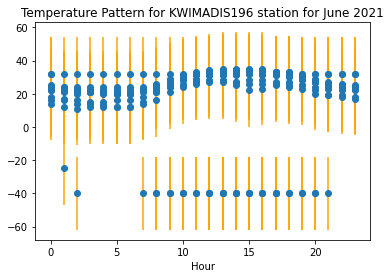

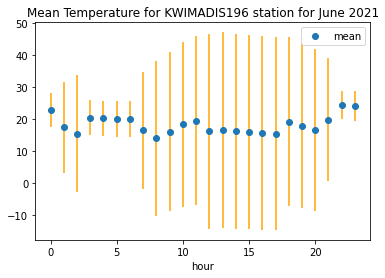

In [280]:
normal_kwifitch = normal_data[normal_data.stationID=='KWIMADIS196']

plt.errorbar(normal_kwifitch.hour, normal_kwifitch.temperature, yerr=normal_kwifitch.temperature.std(), fmt='o', ecolor='orange', capthick=2)
plt.xlabel('Hour')
plt.title('Temperature Pattern for KWIMADIS196 station for June 2021')

normal_kwifitch.groupby('hour').agg({'temperature':['mean','std']}).reset_index().plot(x='hour', y='temperature', yerr='std', fmt='o', ecolor='orange', capthick=2)
plt.title('Mean Temperature for KWIMADIS196 station for June 2021')

Text(0.5, 1.0, 'Mean Temperature for KWIMADIS338 station for June 2021')

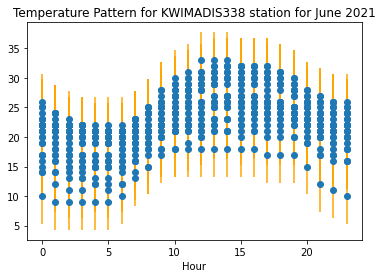

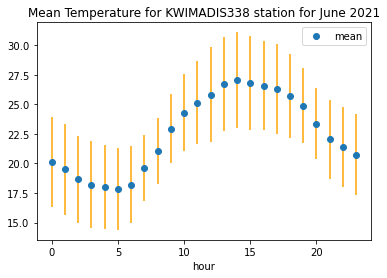

In [279]:
normal_kwifitch = normal_data[normal_data.stationID=='KWIMADIS338']

plt.errorbar(normal_kwifitch.hour, normal_kwifitch.temperature, yerr=normal_kwifitch.temperature.std(), fmt='o', ecolor='orange', capthick=2)
plt.xlabel('Hour')
plt.title('Temperature Pattern for KWIMADIS338 station for June 2021')

normal_kwifitch.groupby('hour').agg({'temperature':['mean','std']}).reset_index().plot(x='hour', y='temperature', yerr='std', fmt='o', ecolor='orange', capthick=2)
plt.title('Mean Temperature for KWIMADIS338 station for June 2021')

In [38]:
grouped_data['std_dev'] = grouped_data.groupby('hour')['temperature'].transform('std')

Text(0.5, 1.0, 'Temperature Pattern for all station for June 2021')

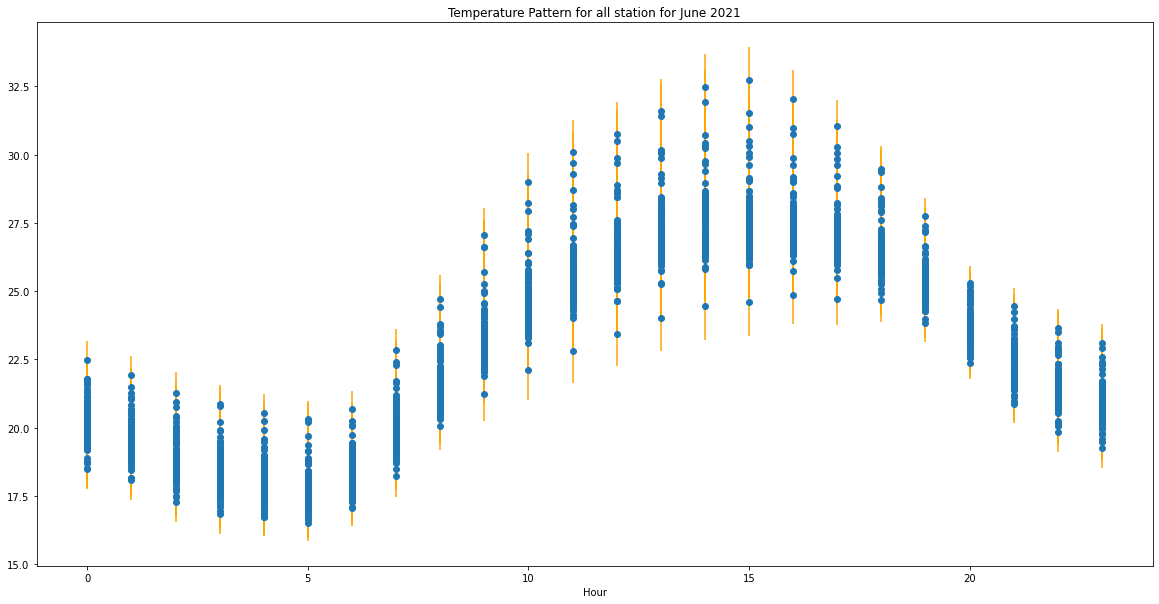

In [39]:
# normal_data.groupby('hour').agg({'temperature':['mean','std']}).reset_index().plot(x='hour', y='temperature', yerr='std', fmt='o', ecolor='orange', capthick=2)
# plt.title('Mean Temperature for all stations for June 2021')



plt.figure(figsize=(20,10))
# plt.errorbar(grouped_data.hour, grouped_data.temperature, yerr=grouped_data.temperature.std(), fmt='o', ecolor='orange', capthick=2)
plt.errorbar(grouped_data.hour, grouped_data.temperature, yerr=grouped_data.std_dev, fmt='o', ecolor='orange', capthick=2)

plt.xlabel('Hour')
plt.title('Temperature Pattern for all station for June 2021')


In [46]:
pe.scatter(gd, x="hour", y="temperature", color='station', title='Temperature Pattern for Normal Stations',)

# Analysis of how temperature varies with tree coverage

In [376]:
from lib import crowdqc as cqc
grouped_data = pd.read_csv('Analytics/temp_data/grouped_data_untouched.csv')

In [355]:
dp.plot_(grouped_data, animation_frame_comp='hour',resample=False)

In [21]:
pe.box(grouped_data, x="valueTreefraction", y="temperature", title='Temperature Pattern for Normal Stations',)

In [478]:
grouped_data = pd.read_csv('Analytics/temp_data/grouped_data_untouched.csv')

In [389]:
pe.scatter(grouped_data.query("hour==12"),
                     x="valueTreefraction", 
                     y="temperature", 
                     color='station', 
                     
                     hover_data=['station','temperature','valueImperviousfraction','hour'])

# plt.scatter(grouped_data.query("hour==12").valueTreefraction, grouped_data.query("hour==12").temperature)

In [390]:
gd2 = grouped_data[grouped_data.valueTreefraction>0]

In [479]:
quants=[0.025, 0.97]
# predictions, outlier_dict = filter_quartiles(grouped_data,quantiles=quants)

predictions1,outliers_tree = filter_quartiles(grouped_data,quantiles=[0.025, 0.97])
predictions2,outliers_impe = filter_quartiles(grouped_data,feature_column='valueImperviousfraction')


In [482]:
set([ k for row in list(outliers_tree.values()) for k in row])
# outlier_dict

{'KWIFITCH38',
 'KWIMADIS104',
 'KWIMADIS114',
 'KWIMADIS120',
 'KWIMADIS162',
 'KWIMADIS308',
 'KWIMADIS324',
 'KWIMADIS33',
 'KWIMADIS353',
 'KWIMADIS50',
 'KWIMADIS65',
 'KWIMCFAR10',
 'KWIMIDDL39',
 'KWIMONON7',
 'KWISUNPR14',
 'KWIVERON28',
 'KWIVERON48',
 'KWIVERON57',
 'KWIWAUNA18'}

In [485]:
for hour in predictions1.keys():
    # if hour in [7,8]:
    figx = pe.scatter(grouped_data.query("hour==@hour"),x = 'valueTreefraction', y='temperature',color='station',title=f'Temperature Pattern for Normal Stations at hour : {hour} ')
    figx.add_trace(go.Scatter(x=grouped_data.query("hour==@hour").valueTreefraction, y=predictions1[hour][quants[0]], mode='lines', name='5% line'))
    figx.add_trace(go.Scatter(x=grouped_data.query("hour==@hour").valueTreefraction, y=predictions1[hour][quants[1]], mode='lines', name='95% line'))
    figx.show()

In [437]:
import pandas as pd
wind_data = pd.read_csv('Analytics/wind_data.csv')
wind_data.DATE = pd.to_datetime(wind_data.DATE)
wind_data = wind_data[(wind_data.DATE.dt.year==2021) & (wind_data.DATE.dt.month==6)]

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_81187/2175824136.py:2: DtypeWarning:

Columns (3,21,27,28,29,31,32,33,38,42,43,44,49,50,52,54,56,64,70,72,73,74,76,77,89,90,96,97,98,99,100,101,102,103,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.



In [471]:
wind_cols = [k for k in  wind_data.columns if 'wind' in k.lower() or "wnd" in k.lower()]
wind_cols = ['STATION', 'DATE', 'SOURCE',]+ wind_cols
wind_data_ = wind_data[wind_cols]
wind_data_.isna().sum()

wind_data_seg = wind_data_[['STATION', 'DATE','HourlyWindDirection','HourlyWindSpeed']]
# wind_data_mean = wind_data_seg.resample('H', on='DATE').mean().reset_index()
wind_data_seg['hour'] = wind_data_seg.DATE.dt.hour
wind_data_seg

,STATION,DATE,HourlyWindDirection,HourlyWindSpeed,hour
32153,72641014837,2021-06-01 00:00:00,NaN,3.0,0
32154,72641014837,2021-06-01 00:53:00,210,5.0,0
32155,72641014837,2021-06-01 01:53:00,190,3.0,1
32156,72641014837,2021-06-01 02:53:00,200,5.0,2
32157,72641014837,2021-06-01 03:53:00,190,7.0,3
...,...,...,...,...,...
33209,72641014837,2021-06-30 21:53:00,310,3.0,21
33210,72641014837,2021-06-30 22:53:00,040,6.0,22
33211,72641014837,2021-06-30 23:53:00,000,0.0,23
33212,72641014837,2021-06-30 23:59:00,NaN,NaN,23


In [484]:
wind_data_seg[wind_data_seg.hour>=3]

,STATION,DATE,HourlyWindDirection,HourlyWindSpeed,hour
32157,72641014837,2021-06-01 03:53:00,190,7.0,3
32158,72641014837,2021-06-01 04:53:00,220,6.0,4
32159,72641014837,2021-06-01 05:53:00,210,5.0,5
32160,72641014837,2021-06-01 06:00:00,210,5.0,6
32161,72641014837,2021-06-01 06:53:00,VRB,3.0,6
...,...,...,...,...,...
33209,72641014837,2021-06-30 21:53:00,310,3.0,21
33210,72641014837,2021-06-30 22:53:00,040,6.0,22
33211,72641014837,2021-06-30 23:53:00,000,0.0,23
33212,72641014837,2021-06-30 23:59:00,NaN,NaN,23


In [473]:
for hour in range(24):
    plt.plot(kind='bin',wind_data_seg.query("hour==@hour").HourlyWindSpeed)

AttributeError: module 'matplotlib.pyplot' has no attribute 'bin'

(array([197., 269., 216., 220.,  36.,  51.,  27.,   3.,   5.,   2.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

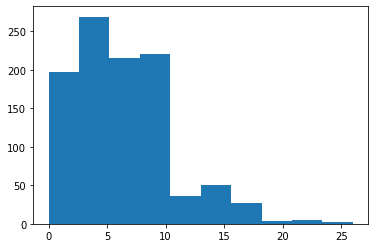

In [474]:
plt.hist(wind_data_seg.HourlyWindSpeed)